In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import regularizers
from keras.callbacks import ReduceLROnPlateau 
from keras.preprocessing import image

In [ ]:
import pathlib
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
train_dir = tf.keras.utils.get_file('flower_photos', origin=url, untar=True)
train_dir = pathlib.Path(train_dir)

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
train_data_generator = ImageDataGenerator(rescale=1.0/255, 
                                          rotation_range=20, 
                                          shear_range=0.2, 
                                          fill_mode='nearest', 
                                          validation_split=0.2)

val_data_generator = ImageDataGenerator(rescale=1.0/255, 
                                        validation_split=0.2)

train_ds = train_data_generator.flow_from_directory(
  train_dir,
  subset="training",
  seed=123,
  target_size=(180, 180),
  batch_size=32)

val_ds = val_data_generator.flow_from_directory(
  train_dir,
  subset="validation",
  seed=123,
  target_size=(180, 180),
  batch_size=32)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
class_names = list(tf.keras.utils.image_dataset_from_directory(train_dir).class_names)
print(class_names)

Found 3670 files belonging to 5 classes.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Found 3670 files belonging to 5 classes.


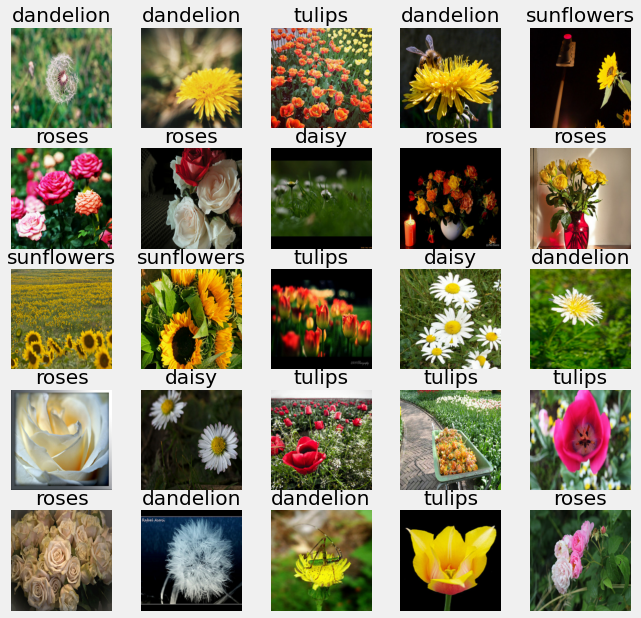

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in tf.keras.utils.image_dataset_from_directory(train_dir).take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(180, 180, 3), filters=96, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=96, kernel_size=(3,3), strides=2))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=192, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=192, kernel_size=(3,3), strides=2))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
92/92 [==============================] - 39s 381ms/step - loss: 1.6379 - accuracy: 0.4158 - val_loss: 1.5219 - val_accuracy: 0.3119
Epoch 2/5
92/92 [==============================] - 34s 365ms/step - loss: 1.2090 - accuracy: 0.4910 - val_loss: 1.3163 - val_accuracy: 0.3995
Epoch 3/5
92/92 [==============================] - 33s 353ms/step - loss: 1.1624 - accuracy: 0.5277 - val_loss: 1.3570 - val_accuracy: 0.4200
Epoch 4/5
92/92 [==============================] - 33s 363ms/step - loss: 1.1343 - accuracy: 0.5356 - val_loss: 1.2348 - val_accuracy: 0.4555
Epoch 5/5
92/92 [==============================] - 33s 354ms/step - loss: 1.0513 - accuracy: 0.5852 - val_loss: 1.1304 - val_accuracy: 0.5568


In [ ]:
model = Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(180, 180, 3))),
    tf.keras.layers.GlobalAveragePooling2D(),
    Flatten(), 
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  
])
model.layers[0].trainable = False

234545216/234545216 [==============================] - 2s 0us/step


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_fit = model.fit(train_ds, epochs=3, validation_data=val_ds)

Epoch 1/3
92/92 [==============================] - 43s 385ms/step - loss: 0.6976 - accuracy: 0.7550 - val_loss: 0.5516 - val_accuracy: 0.8112
Epoch 2/3
92/92 [==============================] - 33s 362ms/step - loss: 0.3838 - accuracy: 0.8639 - val_loss: 0.4373 - val_accuracy: 0.8536
Epoch 3/3
92/92 [==============================] - 34s 369ms/step - loss: 0.2999 - accuracy: 0.8867 - val_loss: 0.4261 - val_accuracy: 0.8564


In [ ]:
def plot_metrics(trained_model, metric, legend_loc):
  plt.style.use('fivethirtyeight')
  plt.plot(trained_model.history[metric])
  validation_metric = 'val_' + metric
  plt.plot(trained_model.history[validation_metric])
  plot_title = 'Model ' + metric.capitalize()
  plt.title(plot_title)
  plt.ylabel(metric.capitalize())
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc=legend_loc)
  plt.show()

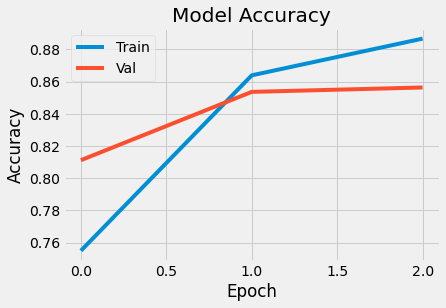

In [ ]:
plot_metrics(model_fit, 'accuracy', 'upper left')

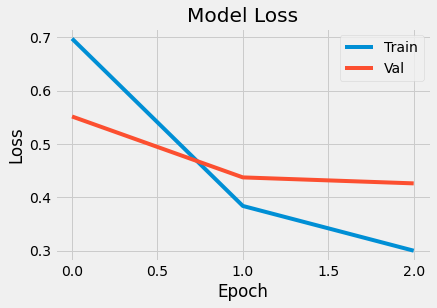

In [ ]:
plot_metrics(model_fit, 'loss', 'upper right')